<a href="https://colab.research.google.com/github/bjpark-forest/2023-1-Intro-DataScience/blob/main/12%EC%A3%BC%EC%B0%A8%EA%B3%BC%EC%A0%9C_2023431213_%EB%B0%95%EB%B4%89%EC%A3%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# 맷플롯 한글 폰트 깨짐 현상에 대한 해결 방법
# 1) 한글 폰트 설치
# 2) 설치 후 런타임 다시 시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [1]:
# 3) 한글 폰트 읽어오기

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_path, size=10).get_name()

plt.rc('font', family=font_name)

# 8.3 연습문제

## 상관분석

[준비파일 : 지역별 시민행복지수(2021).xlsx] [데이터프레임명 : hapiness2021]
### 다음은 공공 데이터 포털에서 “서울시 시민행복지수 통계”에 대한 데이터를 확인하고 행복지수와 다른 변수간의 상관관계를 알아보고자 한다.
* url : https://data.seoul.go.kr/dataList/26/S/2/datasetView.do
* 시민행복지수 : 서울시민의 주관적인 행복정도로, 건강상태ㆍ재정상태ㆍ주위 친지
친구와의 관계ㆍ가정생활ㆍ사회생활의 만족지수를 산출함

###문제1
- 엑셀 데이터를 불러와서 데이터를 확인하는 코드이다. 빈 칸에 가장 알맞은 코드를 완성하시오.

In [2]:
import pandas as pd 
happiness2021=pd.read_excel('지역별 시민행복지수(2021).xlsx')
happiness2021

,순위,지역,행복지수,자신의 건강상태,자신의 재정상태,주위 친지 친구와의 관계,가정생활,사회생활
0,1,강남구,6.53,6.86,5.99,6.65,6.66,6.48
1,2,송파구,6.45,6.81,5.91,6.55,6.55,6.42
2,3,광진구,6.38,6.70,5.78,6.54,6.52,6.39
3,4,노원구,6.38,6.72,5.80,6.48,6.54,6.35
4,5,서초구,6.38,6.66,5.88,6.51,6.54,6.32
5,6,동작구,6.36,6.71,5.85,6.44,6.53,6.29
6,7,중구,6.35,6.61,5.84,6.50,6.49,6.33
7,8,영등포구,6.33,6.54,5.87,6.45,6.55,6.23
8,9,중랑구,6.32,6.67,5.80,6.43,6.45,6.27
9,10,마포구,6.29,6.72,5.79,6.38,6.44,6.12


In [3]:

happiness2021.columns

Index(['순위', '지역', '행복지수', '자신의 건강상태', '자신의 재정상태', '주위 친지 친구와의 관계', '가정생활',
       '사회생활'],
      dtype='object')

###문제2
- 다음은 모든 컬럼명들의 빈 공백을 언더바(_)로 대체하는 코드이다. 빈 칸에 가장 알맞은 코드를 완성하시오.

In [4]:
happiness2021.columns = happiness2021.columns.str.replace(' ', '_')
happiness2021.columns

Index(['순위', '지역', '행복지수', '자신의_건강상태', '자신의_재정상태', '주위_친지_친구와의_관계', '가정생활',
       '사회생활'],
      dtype='object')

###문제3
- 다음은 모든 변수 간 상관관계지수를 출력하는 코드이다. 빈 칸에 가장 알맞은 코드를 완성하시오. 

In [5]:
corr = happiness2021.corr(numeric_only=True)
corr

,순위,행복지수,자신의_건강상태,자신의_재정상태,주위_친지_친구와의_관계,가정생활,사회생활
순위,1.000000,-0.978812,-0.832581,-0.920552,-0.906710,-0.901350,-0.928174
행복지수,-0.978812,1.000000,0.861772,0.928807,0.934476,0.923024,0.937074
자신의_건강상태,-0.832581,0.861772,1.000000,0.758057,0.777438,0.720133,0.717052
자신의_재정상태,-0.920552,0.928807,0.758057,1.000000,0.780666,0.809592,0.861819
주위_친지_친구와의_관계,-0.906710,0.934476,0.777438,0.780666,1.000000,0.907678,0.857601
가정생활,-0.901350,0.923024,0.720133,0.809592,0.907678,1.000000,0.839956
사회생활,-0.928174,0.937074,0.717052,0.861819,0.857601,0.839956,1.000000


###문제4
- 다음은 행복지수와 다른 변수와의 상관관계 지수를 출력하는 코드이다. 빈 칸에 가장 알맞은 코드를 완성하시오. 

In [6]:
pd.DataFrame(corr['행복지수'].sort_values(ascending=False))                   # 빈칸                     )

,행복지수
행복지수,1.000000
사회생활,0.937074
주위_친지_친구와의_관계,0.934476
자신의_재정상태,0.928807
가정생활,0.923024
자신의_건강상태,0.861772
순위,-0.978812


###문제5
- 다음은 모든 변수간의 상관관계를 히트맵으로 그리는 코드이다. 빈 칸에 가장 알맞은 코드를 완성하시오. 

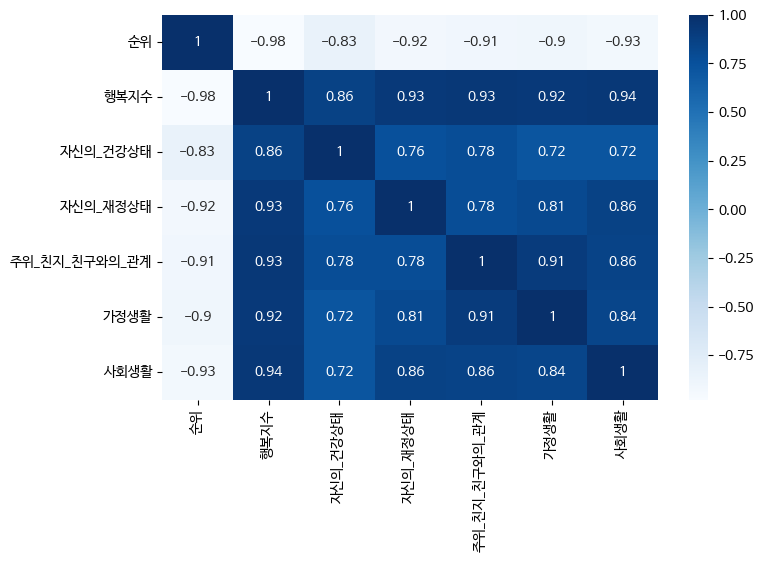

In [9]:
import seaborn as sns
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.figure(figsize=(8,5))
plt.rcParams['axes.unicode_minus'] = False # 음수표시 
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()

###문제6
- 다음은 모든 변수간의 상관관계를 히트맵으로 그리는 코드를 완성하시오. 빈 칸에 가장 알맞은 코드를 완성하시오. 

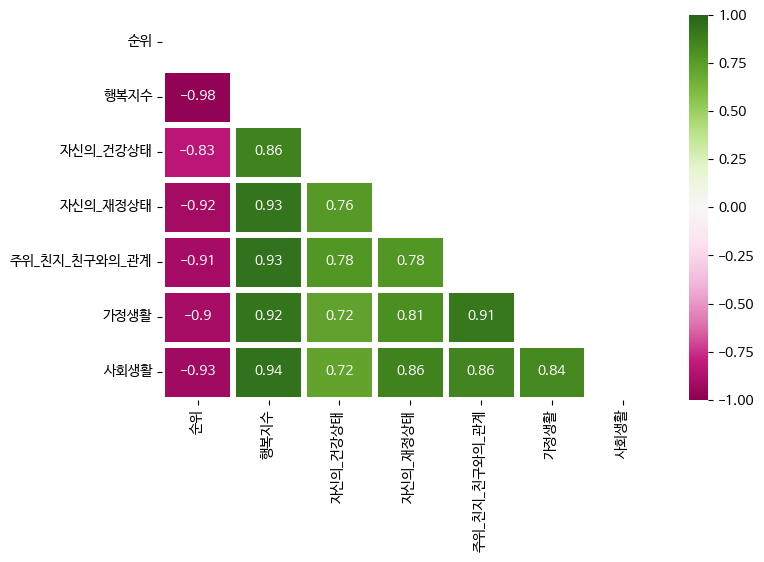

In [10]:
import numpy as np

plt.figure(figsize=(8,5))
corr = happiness2021.corr(numeric_only=True)

upp_mask = np.triu(corr)
sns.heatmap(corr,mask = upp_mask, vmin=-1, vmax=1, annot = True, cmap ='PiYG', linewidths=4 )
plt.show()

## 연관분석

### 연관분석을 하기 위한 필요한 모듈과 데이터셋이 아래와 같이 생성되어 있다고 가정했을 때 다음 질문에 차례대로 답하시오.

In [21]:
# 필요한 pandas, mlxtend 패키지를 로드한다
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [22]:
# 데이터셋 생성하기
dataset=[['치즈','우유','생수'],
         ['생수','수박','우유','맥주'],
         ['수박','생수','맥주'],
         ['생수','우유','맥주'],
         ['치즈','우유','맥주']]

###문제7-1
- 다음은 생성된 데이터셋을 통해 학습을 시작하는 코드이다. 실행결과를 보고 빈 칸에 가장 알맞은 코드를 완성하시오. 

In [23]:
te = TransactionEncoder()
te_arr = te.fit(dataset).transform(dataset)
te_arr

array([[False,  True, False,  True,  True],
       [ True,  True,  True,  True, False],
       [ True,  True,  True, False, False],
       [ True,  True, False,  True, False],
       [ True, False, False,  True,  True]])

###문제7-2
- 다음은 7-1에서 생성한 배열을 데이터프레임으로 변경하는 코드이다. 실행결과를 보고 빈 칸에 가장 알맞은 코드를 완성하시오.

In [24]:
df = pd.DataFrame(te_arr, columns=te.columns_)
df

,맥주,생수,수박,우유,치즈
0,False,True,False,True,True
1,True,True,True,True,False
2,True,True,True,False,False
3,True,True,False,True,False
4,True,False,False,True,True


###문제7-3
- 다음은 7-2에서 생성한 데이터프레임으로 apriori 알고리즘 사용하여 지지도(support)를 알아보는 코드이다. 실행 결과를 보고 빈 칸에 가장 알맞은 코드를 완성하시오. 최소지지도는 0.5로 설정한다.

In [25]:
itemset = apriori(df, min_support=0.5, use_colnames=True )
itemset.sort_values('support',ascending=False)
# 특별히 옵션을 주지 않으면 기본 지지도(support)는 0.5로 설정된다. 

,support,itemsets
0,0.8,(맥주)
1,0.8,(생수)
2,0.8,(우유)
3,0.6,"(생수, 맥주)"
4,0.6,"(우유, 맥주)"
5,0.6,"(우유, 생수)"


In [26]:
itemset = apriori(df, min_support=0.6, use_colnames=True)
itemset.sort_values('support',ascending=False).head()
# 생수를 살 확률은 100%, 우유와 생수를 살 확률은 75%

,support,itemsets
0,0.8,(맥주)
1,0.8,(생수)
2,0.8,(우유)
3,0.6,"(생수, 맥주)"
4,0.6,"(우유, 맥주)"


In [ ]:
# 신뢰도 확인
# min_threshold 의 기본값은 0.8 이다.

###문제7-4
- 다음은 7-3 결과를 이용하여 연관규칙을 알아보는 코드이다. 실행 결과를 보고 빈 칸에 가장 알맞은 코드를 완성하시오. 최소신뢰도는 0.8로 설정(기본값)한다.

In [20]:
from mlxtend.frequent_patterns import association_rules
association_rules(itemset, metric='lift', min_threshold=0.8)

# 5번 인덱스 데이터를 보면 (치즈,생수)를 구매한 고객이 (우유)를 구매할  확률이 높다고 판단 할 수 있다.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(생수),(맥주),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
1,(맥주),(생수),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
2,(우유),(맥주),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
3,(맥주),(우유),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
4,(우유),(생수),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
5,(생수),(우유),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
